**Zomato Datset Exploratory Data Analysis**

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
dataset=pd.read_csv("zomato.csv",encoding='latin-1')
dataset.head(3)
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [47]:
#They all and some other function is use for understanding dataset
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**In Data Analysis What All things we do**

1.Missing Value.

2.Explore About the Numerical Variables.

3.Explore About Categorical Variables.

4.Finding Relationship between features.



In [48]:
dataset.isnull().sum()
dataset.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [49]:
[features for features in dataset.columns if dataset[features].isnull().sum()>0]

['Cuisines']

<Axes: >

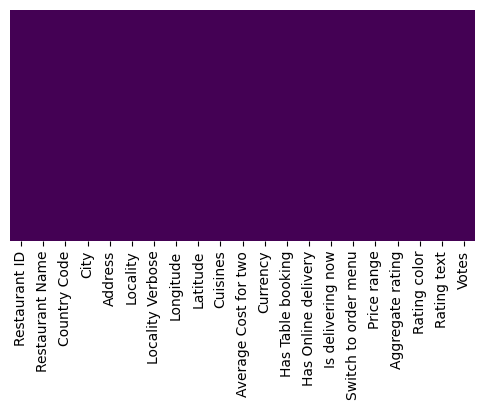

In [50]:
plt.figure(figsize=(6,3),frameon=True,clear=True)
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
#Analysis the country head data
data_Country=pd.read_excel("Country-Code.xlsx")
data_Country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [52]:
final_Data=pd.merge(dataset,data_Country,on='Country Code',how='left')
# dataset.columns

In [53]:
#For clarify the value of any features
final_Data.dtypes
final_Data.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [54]:
Country_names=final_Data.Country.value_counts().index
Country_value=final_Data.Country.value_counts().values

**Plot Pie Chart- Top 3 Countries That uses Zomato**

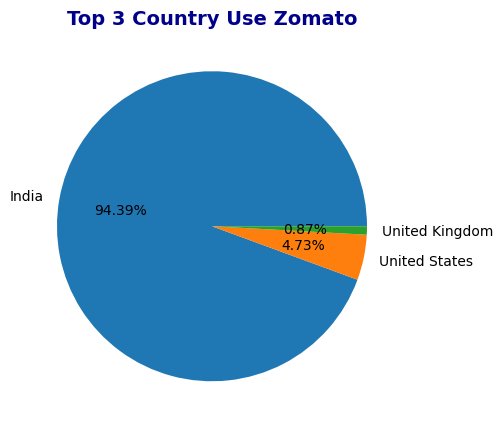

In [55]:
plt.figure(figsize=(5,6))
plt.title("Top 3 Country Use Zomato",fontweight='bold',fontsize=14,color='darkblue')
plt.pie(Country_value[:3],labels=Country_names[:3],autopct="%1.2f%%")
plt.show()

**Observation : Zomato mazimum records or transaction are from India Afer that USA and when united kingdoms**

In [56]:
## Numerical Variable
Rating=dataset.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
Rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


**Observation :**

**1.When Rating is between 4.5 to 4.9-----> Excellent**

**2.When Rating are bewteen 4.0 to 3.4 -------> very Good**

**3.when Rating is between 3.5 to 3.9 -------> Good**

**4.Rating is between 3.0 to 3.4 ---> Average**

**5.Rating is between 2.5 to 2.9 ----> average**

**6. When Rating is between 2.0 to 2.4 ----> Average**


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

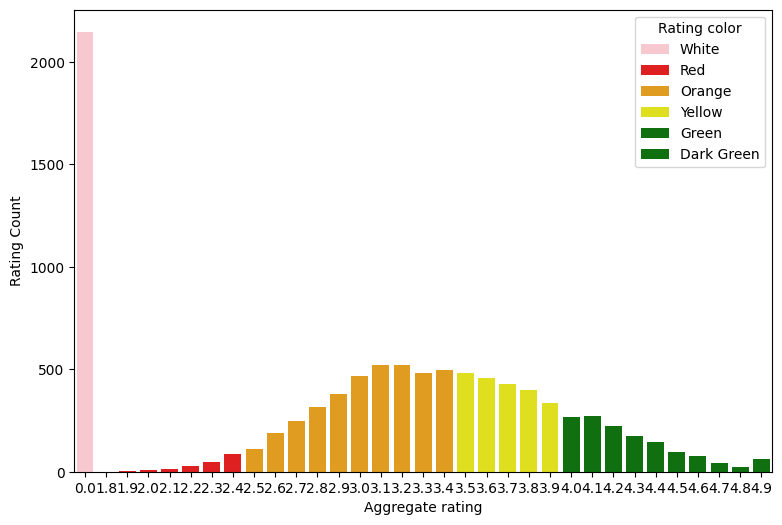

In [57]:
plt.figure(figsize=(9,6))
Rating.head()
sns.barplot(x="Aggregate rating",y="Rating Count",data=Rating,hue="Rating color",palette=["pink","red","Orange","yellow","green","green"])


**Observation :**

 **1.Not Rated Count is Very High**
 
**2.Maximum Number of Rating are between 2.5 to 3.4**

C:\Users\LAVI TARAR\AppData\Local\Temp\ipykernel_4056\4222052598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating color",stat="percent",data=Rating,palette=["pink","red","Orange","yellow","green","green"])


<Axes: xlabel='Rating color', ylabel='percent'>

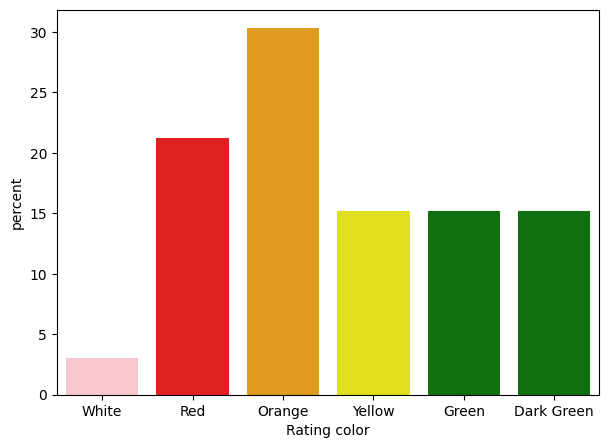

In [58]:
plt.figure(figsize=(7,5))
sns.countplot(x="Rating color",stat="percent",data=Rating,palette=["pink","red","Orange","yellow","green","green"])

In [59]:
Rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [60]:
# Size : Counts the number of rows in each group. Returns a Series with a MultiIndex.
# Reset_index : commonly used in pandas to count group sizes and return the result as a DataFrame.
final_Data.groupby(['Aggregate rating','Country']).size().reset_index().head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [66]:
#Find out which currency is used by which country ?
final_Data[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
## Which Country do have online deliveries option ?
# final_Data[final_Data[]]
final_Data[final_Data['Has Online delivery']=="Yes"].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [ ]:
##How Many Country are there Which have Online delivery ?
final_Data[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


**Observation**

**1.Online Deliveries are are Available in India And UAE**

**Create a Pie Chart for cities Distribution**

In [76]:
final_Data.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

In [86]:
city_values=final_Data.Country.value_counts().values
city_labels=final_Data.City.value_counts().index

([<matplotlib.patches.Wedge at 0x1daad9e7320>,
 [Text(-1.079055178053478, 0.21363502221306527, 'New Delhi'),
  Text(1.0676486633072917, -0.26481376802982426, 'Gurgaon'),
  Text(1.0974500606462831, -0.07485562361953522, 'Noida'),
  Text(1.0997704220141564, -0.022472624742216625, 'Faridabad')])

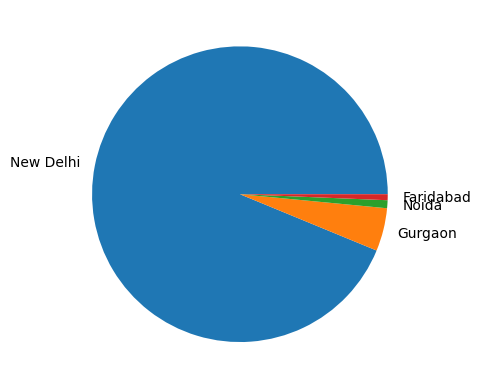

In [88]:
plt.pie(city_values[:4],labels=city_labels[:4])

**Leveraged Python for EDA on transactional data to reveal high-revenue segments and seasonal trends, enabling targeted business actions and improved performance.**